In [1]:
# Importing relevant libraries

# Data wrangling
import numpy as np
import pandas as pd
from tqdm import tqdm

# Data Visualization
# import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots


# Data pre-processing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Machine learning Models
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
data =  pd.read_csv("student's dropout dataset.csv")
data.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
pd.set_option('display.max_columns', None)
data.describe(include = 'all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [4]:
data_viz = data.copy()
data_viz['Gender'] = data_viz['Gender'].map({1:'Male', 0:'Female'})
data_viz['Course'] = data_viz['Course'].map({1: 'Biofuel Production Technologies',
 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)',
 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing',
 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication',
 16: 'Basic Education', 17: 'Management (evening attendance)'})

In [5]:
data_viz['Marital status'] = data_viz['Marital status'].map({1:'Single', 2: 'Married',
                                                             3: 'Widower', 4: 'Divorced',
                                                             5: 'Facto union', 6: 'Legally Separated'})

In [6]:
dummies = pd.get_dummies(data['Target'])

#Drop all columns except that for Dropout
dummies.drop(['Enrolled',	'Graduate'], axis = 1, inplace= True)
data['Target'] = dummies
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [7]:
y = np.array(data['Target'])
X_features = data.drop('Target', axis = 1)
X_features.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [8]:
y[:5]

array([1, 0, 1, 0, 0], dtype=uint8)

In [9]:
scaler =  StandardScaler()
X = scaler.fit_transform(X_features)
X

array([[-0.29482875,  0.21006857,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.16740639, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.11109377, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.35614386, -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# Calculate the baseline accuracy to beat
target_value, frequency = np.unique(y, return_counts = True)
print("Unique Values:", target_value)

print("Frequency Values:", frequency)

# Maximum frequency value
max_val = frequency.max()
length_y = len(y)

print('\n')

baseline_acc = round((max_val/length_y) * 100, 3)
print(f'The baseline accuracy to beat is {baseline_acc}%')

Unique Values: [0 1]
Frequency Values: [3003 1421]


The baseline accuracy to beat is 67.88%


In [13]:
trained_models = []
lr_model = LogisticRegression(random_state = 42, max_iter= 1000)
lr_model.fit(X_train, y_train)


# Predict target values for train data
y_pred_train = lr_model.predict(X_train)

# Predict target values for validation data
y_pred_val = lr_model.predict(X_val)

# Predict target values for test data
y_pred = lr_model.predict(X_test)

# Evaluate the model's accuracy
lr_acc_train = round(accuracy_score(y_train, y_pred_train), 3)
lr_acc_val = round(accuracy_score(y_val, y_pred_val), 3)
lr_acc = round(accuracy_score(y_test, y_pred), 2)
print(f'Accuracy of logistic regression model on the training set is {lr_acc_train * 100}%')
print(f'Accuracy of logistic regression model on the validation set is {lr_acc_val * 100}%')
print('\n')
print(f'Accuracy of logistic regression model on the test set is {lr_acc * 100}%')

# Add to model list
trained_models.append(lr_model)

Accuracy of logistic regression model on the training set is 88.7%
Accuracy of logistic regression model on the validation set is 86.3%


Accuracy of logistic regression model on the test set is 87.0%


In [14]:
depth_values = list(range(1, 21))

# Create empty list for training data and validation data
training_acc = []
validation_acc = []

for d in tqdm(depth_values):
  tree_model = DecisionTreeClassifier(max_depth=d, random_state=42)
  tree_model.fit(X_train, y_train)

  # Training accuracy
  y_pred_training = tree_model.predict(X_train)
  training_acc.append(accuracy_score(y_train, y_pred_training))

  # Validation accuracy
  y_pred_validation = tree_model.predict(X_val)
  validation_acc.append(accuracy_score(y_val, y_pred_validation))

100%|██████████| 20/20 [00:00<00:00, 23.93it/s]


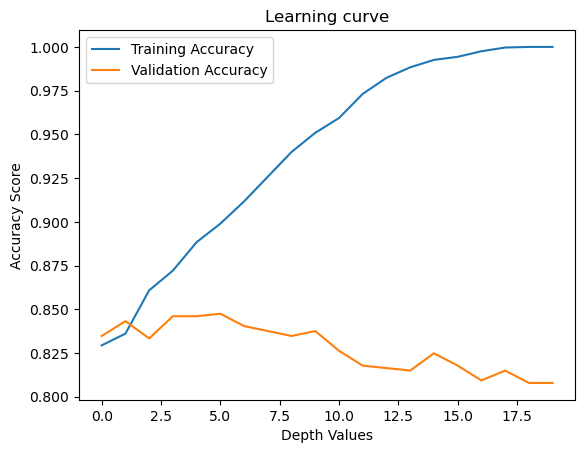

In [15]:
import matplotlib.pyplot as plt
plt.plot(training_acc, label = 'Training Accuracy')
plt.plot(validation_acc, label = 'Validation Accuracy')
plt.xlabel('Depth Values')
plt.ylabel('Accuracy Score')
plt.title('Learning curve')
plt.legend();

In [16]:
best_val_acc = max(validation_acc)
best_depth = validation_acc.index(best_val_acc) +1
print(f'Best depth value with an accuracy of {round(best_val_acc * 100, 2)}% on the validation set is {best_depth}')

Best depth value with an accuracy of 84.75% on the validation set is 6


In [17]:
tree_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = tree_model.predict(X_test)

# Evaluate the model's accuracy
tree_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Decision tree model is {tree_acc * 100}%')


# Add to model list
trained_models.append(tree_model)

Accuracy of Decision tree model is 83.1%


In [18]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score_list = {}
scores = 0
svm_linear = []

for k in tqdm(kernels):
    svm_model = SVC(random_state = 42, kernel= k)
    svm_model.fit(X_train, y_train)
    if k == 'linear':
      svm_linear.append(svm_model)
    f_score = svm_model.score(X_val, y_val)
    score_list.update({k: f_score})


score_list

100%|██████████| 4/4 [00:01<00:00,  2.28it/s]


{'linear': 0.864406779661017,
 'poly': 0.846045197740113,
 'rbf': 0.865819209039548,
 'sigmoid': 0.807909604519774}

In [19]:
max_val = max(score_list.values())
list_values = list(score_list.values())
list_keys = list(score_list.keys())

# Best kernel
k = list_keys[list_values.index(max_val)]

In [20]:
svm_model = SVC(random_state = 42, kernel = k)
svm_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
svm_acc = round(accuracy_score(y_test, y_pred),3)
print(f'Accuracy of Support vector classifier model is {svm_acc * 100}%')

# Add to model list
trained_models.append(svm_model)

Accuracy of Support vector classifier model is 85.5%


In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = rf_model.predict(X_val)
rf_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With default parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')

With default parameters: 
Accuracy of Random forest model on training data is 100.0%
Accuracy of Random forest model on validation data is 86.2%


In [22]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_train, y_train)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')

Grid search parameters: {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 100}


In [23]:
grid_rf_model = RandomForestClassifier(random_state = 42,
                                       max_depth = best_rf_parameters['max_depth'],
                                      max_leaf_nodes = best_rf_parameters['max_leaf_nodes'],
                                      n_estimators = best_rf_parameters['n_estimators'],
                                       max_features = best_rf_parameters['max_features'])
grid_rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = grid_rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = grid_rf_model.predict(X_val)
rf_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With Grid search best estimator parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')

With Grid search best estimator parameters: 
Accuracy of Random forest model on training data is 88.3%
Accuracy of Random forest model on validation data is 86.6%


In [24]:
y_pred = grid_rf_model.predict(X_test)
rf_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Random forest model on test data is {rf_acc * 100}%')

# Add to model list
trained_models.append(grid_rf_model)

Accuracy of Random forest model on test data is 85.1%


In [25]:
param_grid = {'n_neighbors': np.arange(1, 25)}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit grid
grid_knn.fit(X_train, y_train)
best_knn_parameters = grid_knn.best_params_
print(f'Grid search parameters: {best_knn_parameters}')

Grid search parameters: {'n_neighbors': 11}


In [26]:
grid_knn_model = KNeighborsClassifier(n_neighbors= best_knn_parameters['n_neighbors'])
grid_knn_model.fit(X_train, y_train)
# Predict target values for training data
y_pred_train = grid_knn_model.predict(X_train)
knn_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = grid_knn_model.predict(X_val)
knn_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With Grid search best estimator parameters: ')
print(f'Accuracy of KNN model on training data is {knn_acc_train * 100}%')
print(f'Accuracy of KNN model on validation data is {knn_acc_val * 100}%')

With Grid search best estimator parameters: 
Accuracy of KNN model on training data is 86.0%
Accuracy of KNN model on validation data is 83.5%


In [27]:
train_accuracy = []
val_accuracy = []
for i in tqdm(range(1,21)):
  # Train a Knn model
  knn_model = KNeighborsClassifier(n_neighbors=i)
  # Fit model
  knn_model.fit(X_train, y_train)

  # Prediction for training data
  y_pred_train = knn_model.predict(X_train)
  # Prediction for validation data
  y_pred_val = knn_model.predict(X_val)

  # Accuracy Scores
  train_accuracy.append(accuracy_score(y_train, y_pred_train))
  val_accuracy.append(accuracy_score(y_val, y_pred_val))

100%|██████████| 20/20 [00:05<00:00,  3.65it/s]


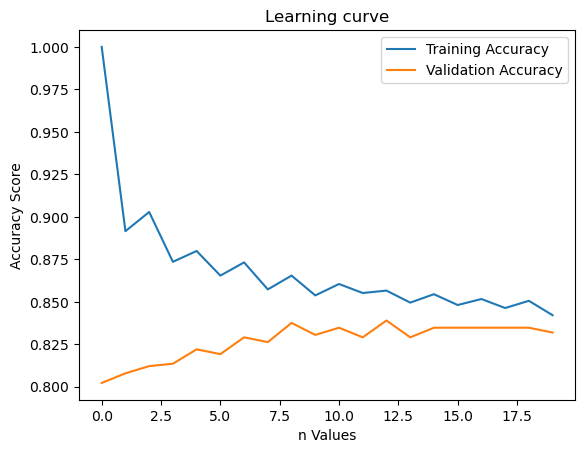

In [28]:
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('n Values')
plt.ylabel('Accuracy Score')
plt.title('Learning curve')
plt.legend();

In [29]:
n = val_accuracy.index(max(val_accuracy)) + 1
knn_model = KNeighborsClassifier(n_neighbors=n)
# knn_model = KNeighborsClassifier(n_neighbors=21)
knn_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
knn_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of KNN model is {knn_acc * 100}%')

# Confusion Matrix
knn_matrix = confusion_matrix(y_test, y_pred)

# Add to model list
trained_models.append(knn_model)

Accuracy of KNN model is 82.0%
